In [1]:
from IPython.display import display, HTML, clear_output
import time
import random
import requests
from bs4 import BeautifulSoup
import json
import matplotlib.pyplot as plt
import numpy as np


Test over! Your score is 19/29.

Your average time per question is 2.23 seconds.

Your total time taken for the test is 46.90 seconds.


NameError: name 'correct_number' is not defined

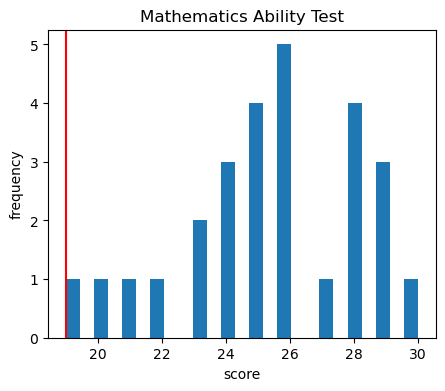

In [2]:
def send_to_google_form(data_dict, form_url):
    """
    Sends data to a Google Form using the specified form URL.

    Parameters:
    - data_dict (dict): A dictionary containing data to be sent to the form.
    - form_url (str): The URL of the Google Form.

    Returns:
    - bool: True if the data is successfully sent, False otherwise.
    """
    form_id = form_url[34:90]
    view_form_url = f'https://docs.google.com/forms/d/e/{form_id}/viewform'
    post_form_url = f'https://docs.google.com/forms/d/e/{form_id}/formResponse'

    page = requests.get(view_form_url)
    content = BeautifulSoup(page.content, "html.parser").find('script', type='text/javascript')
    content = content.text[27:-1]
    result = json.loads(content)[1][1]
    form_dict = {}

    loaded_all = True
    for item in result:
        if item[1] not in data_dict:
            print(f"Form item {item[1]} not found. Data not uploaded.")
            loaded_all = False
            return False
        form_dict[f'entry.{item[4][0][0]}'] = data_dict[item[1]]

    post_result = requests.post(post_form_url, data=form_dict)
    return post_result.ok

def display_question(question, display_time, font_size=35, color='white', text_align='center', padding_top='20px'):
    """
    Display a question using HTML formatting.

    Parameters:
    - question (list): A list of strings representing the question.
    - display_time (float): Time to display the question.
    - font_size (int): Font size for the displayed question.
    - color (str): Color of the text.
    - text_align (str): Text alignment.
    - padding_top (str): Padding at the top.

    Returns:
    None
    """
    equation = ' '.join(question)
    style = f"font-size:{font_size}px; color:{color}; text-align:{text_align}; padding-top:{padding_top};"
    html_question = f"<div style='{style}'>{equation}</div>"
    display(HTML(html_question))
    time.sleep(display_time)

def get_user_answer():
    """
    Get user's numerical input as an answer to a question.

    Returns:
    float: User's numerical input.
    """
    while True:
        try:
            return float(input("Your answer: "))
        except ValueError:
            print("Invalid input. Please enter a number.")

def run_math_stroop(question, answer):
    """
    Run a math stroop test with a given question and answer.

    Parameters:
    - question (list): A list of strings representing the question.
    - answer (float): The correct answer to the question.

    Returns:
    tuple: A tuple containing the user's score (1 or 0) and the time taken to answer.
    """
    print(f"\nWhen asked, enter the result of the following calculation:")
    
    clear_output(wait=True)
    print(f"\nWhen asked, enter the result of the following calculation:")
    
    for i in range(len(question)):
        display_question(question[i], 0.5, font_size=35, padding_top='40px')
        time.sleep(0.5)
    
    start_time = time.time()
    
    user_answer = get_user_answer()

    while user_answer is None:
        print("Invalid input. Please try again.")
        user_answer = get_user_answer()
    
    end_time = time.time()
    time_taken = end_time - start_time

    clear_output(wait=True)
    
    if abs(user_answer - answer) < 0.001:
        print("Well done!\n")
        time.sleep(1)
        print(f"You took {time_taken:.2f} seconds\n")
        time.sleep(2)
        clear_output(wait=True)
        return 1, time_taken
    else:
        print(f"Wrong. The correct answer is {answer}\n")
        time.sleep(1)
        print(f"You took {time_taken:.2f} seconds\n")
        time.sleep(2)
        clear_output(wait=True)
    
    return 0, 0

# Welcome message and user consent
welcome_message = "<h1>Welcome to the Mathematics Ability Test!</h1>"
centered_message = f"<div style='text-align: center;'>{welcome_message}</div>"
display(HTML(centered_message))
time.sleep(4)
clear_output()

print() 

data_consent_info = """DATA CONSENT INFORMATION:

Please read:

We wish to record your response data
to an anonymized public data repository. Your data will be used for educational teaching purposes
practicing data analysis and visualization.

Please type yes in the box below if you consent to the upload."""

print(data_consent_info)
result = input("\n> ")

consent_to_upload = False

if result.lower() == "yes":
    print("\nThank you for your participation!")
    time.sleep(1.2)
    consent_to_upload = True
else: 
    print("\nYou did not consent to data upload. Proceeding with the test without uploading data.")
    time.sleep(2)

clear_output()

# User ID input
id_instructions = """
Enter your anonymized ID.

To generate an anonymous 4-letter unique user identifier please enter:

- two first letters (in capital) of your favourite fruit.
- two letters based on the initials (first and last name) of a favourite actor / actress (in capitals).

e.g. if your favoutite fruit is orange and favourite actor is Adam Sandler
then your unique identifer would be ORAS
"""

print(id_instructions)
user_id = input("\n> ")

print("User entered id:", user_id)
clear_output()

# Age and sex input
your_age = input("\nPlease enter your age:")
clear_output()
while True:
    your_sex = input("\nPlease enter your sex (male or female):").lower()
    if your_sex in ['male', 'female']:
        break
    else:
        print("Invalid input. Please enter 'male' or 'female'.")

clear_output()

time.sleep(2)

# Equations and answers
equations = [['1', '+2'], ['15', '-4'], ['13', '*3'], ['45', '/5'], ['53', '+12'], ['34', '-26'], ['3', '*4', '+6'],
             ['48', '/2', '-3'], ['(9+2)', '*8'], ['56', '/7', '*0', '+16'], ['11', '^2'], ['20', '-4', '/2'],
             ['5', '*(8-2)'], ['15', '*4'], ['2', '-7', '+3'], ['9', '+3', '*12'], ['87', '-4'], ['4','^3'], 
             ['12', '*6'], ['73','+29'], ['32','*4'], ['93', '+12', '-6'], ['51', '*3'], ['7', '*3'], ['43', '*2'],
             ['3','^3'], ['3', '-5', '+2'], ['18', '*2'], ['10','*10']]

answers = [3, 11, 39, 9, 65, 8, 18, 21, 88, 16, 121, 8, 30, 60, -2, 144, 83, 64, 72, 102, 128, 99, 24, 153, 21, 87, 27, 0, 36, 100]

# Test execution
total_score = 0
total_time = 0
num_questions = 0
duration = 180  
start_time = time.time()

i = 0

while (time.time() - start_time) < duration and i < len(equations):
    score, time_taken = run_math_stroop(equations[i], answers[i])
    total_time += time_taken
    total_score += score
    i += 1
    print("Score:", total_score)
    time.sleep(1)
    clear_output(wait=False)

average_time = total_time / i

print(f"\nTest over! Your score is {total_score}/{len(equations)}.")
print(f"\nYour average time per question is {average_time:.2f} seconds.")
print(f"\nYour total time taken for the test is {total_time:.2f} seconds.")

#tell the participants where they are in the histogram of data
score_ans = [26,25,26,29,20,28,24,25,24,25,24,28,21,30,26,25,23,22,29,28,28,27,26,26,29,23]
score_ans.append(total_score)
plt.figure(figsize=(5,4))
plt.hist(score_ans, bins=25)
plt.title("Mathematics Ability Test")
plt.xlabel("score")
plt.ylabel("frequency")
plt.axvline(x=total_score , color ='red', linestyle='-', label='Your score')
plt.text(total_score,7,f'Your score: {total_score}')
plt.show()

# Data upload only if the user consented
if consent_to_upload:
    score_fraction = f"{total_score}/{len(equations)}"
    data_dict = {'average time': average_time,
                'total time': total_time,
                'user id': user_id,
                'age': your_age,
                'sex': your_sex,
                'score': score_fraction}
    form_url = 'https://docs.google.com/forms/d/e/1FAIpQLSfv-_QPfdMg2ijJaRUdNWi1ajTIe1QYDnNXd5A6X0346F4O4A/viewform?usp=sf_link'
    send_to_google_form(data_dict, form_url)